In [1]:
import pandas as pd
import requests

In [2]:
data_json = requests.get("https://mercados.ambito.com//dolar/mayorista/grafico/2021-01-01/2023-03-14").json()

In [3]:
data_json=data_json[1:] # se saca primer renglon

In [4]:
data = pd.DataFrame(data_json, columns=["Fecha", "TC"]) #se pasa a DF
data = data.drop_duplicates(subset="Fecha", keep="last")

In [5]:
data["Fecha"] = pd.to_datetime(data['Fecha'], format="%d/%m/%Y")
data = data.sort_values("Fecha")
data["TC Anterior"] = data["TC"].shift(1)
data["Fecha Anterior"] = data["Fecha"].shift(1)
data = data.dropna()
data["Dif. Porc"] = (data["TC"] / data["TC Anterior"]) - 1

In [6]:
data["Días"] =( data["Fecha"] - data["Fecha Anterior"]).dt.days
data["TNA"] = data["Dif. Porc"] / data["Días"] * 365 * 100
data["Promedio 5 ds."] = data["TNA"].rolling(5).mean()

<Axes: title={'center': 'Devaluación Histórica Dólar Ofical'}, xlabel='Fecha'>

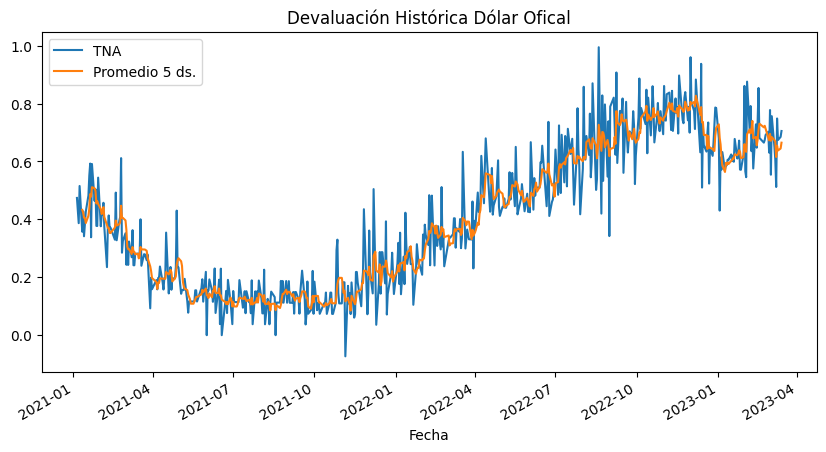

In [7]:
data.plot(x="Fecha", y=["TNA", "Promedio 5 ds."], figsize=(10,5), legend=True, title="Devaluación Histórica Dólar Ofical")


In [8]:
data["Fecha"].max()

Timestamp('2023-03-14 00:00:00')